# Datature Demo - Jason Shin
---


In this short Jupyter notebook, I will walk you through some examples of **using** Datature's vision AI technology to create your own model then analyze and visualize the testing dataset you have.

## Object Detection Model - License Plate Detection



**Training Data**

First, I found a dataset of my interest to use to create your my object detection or instance segmentation model.
In my example, I decided to create a car license plate detection model using 433 images of license plates, sourced from a dataset already available on Kaggle.

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using the lines of code below, you can directly import Kaggle's dataset to the cloud server you are working on.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
!kaggle datasets download -d andrewmvd/car-plate-detection
!unzip -q car-plate-detection.zip -d .

 93% 189M/203M [00:01<00:00, 175MB/s]
100% 203M/203M [00:01<00:00, 164MB/s]


Using the lines of code below, you can directly present your imported images.



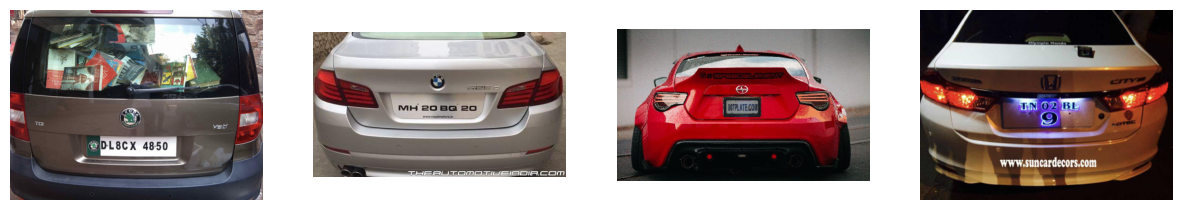

In [ ]:
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt
filelist = os.listdir('/content/images')

images = []

for i in filelist[:10]:
  numberized = Image.open('/content/images/' + i)
  images.append(np.array(numberized))
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axs[i-1].imshow(images[i])
    axs[i-1].axis('off')
plt.show()

In [ ]:
#Running the created model on the testing data
!python3 predict.py     -i input     -m datature-yolov8n.pt     -t 0.5


image 1/15 /content/model/input/Cars355.png: 448x640 1 licence, 230.7ms
image 2/15 /content/model/input/Cars356.png: 448x640 1 licence, 174.8ms
image 3/15 /content/model/input/Cars358.png: 320x640 1 licence, 115.7ms
image 4/15 /content/model/input/Cars359.png: 480x640 (no detections), 173.6ms
image 5/15 /content/model/input/Cars360.png: 384x640 (no detections), 142.8ms
image 6/15 /content/model/input/Cars361.png: 480x640 1 licence, 165.6ms
image 7/15 /content/model/input/Cars362.png: 480x640 (no detections), 164.2ms
image 8/15 /content/model/input/Cars363.png: 448x640 1 licence, 152.3ms
image 9/15 /content/model/input/Cars364.png: 416x640 1 licence, 150.4ms
image 10/15 /content/model/input/Cars365.png: 448x640 1 licence, 156.7ms
image 11/15 /content/model/input/Cars366.png: 384x640 1 licence, 136.9ms
image 12/15 /content/model/input/Cars367.png: 448x640 (no detections), 153.9ms
image 13/15 /content/model/input/Cars368.png: 480x640 1 licence, 174.0ms
image 14/15 /content/model/input/Ca

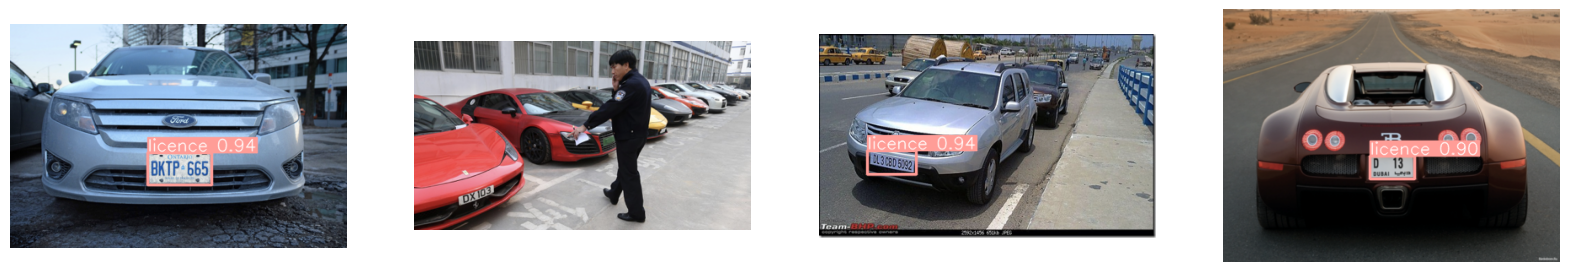

In [ ]:
#Output
filelist = os.listdir('/content/model/runs/detect/predict3')
selected_images = [np.array(Image.open(f'/content/model/runs/detect/predict3/{filename}')) for filename in filelist[2:6]]

fig, axs = plt.subplots(1, len(selected_images), figsize=(20, 5))

for i, img in enumerate(selected_images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

# Result
After uploading and running the model I created using Datature's platform, I successfully stored the output images directly on my cloud server. Due to the limited training dataset size, constrained to 300 images by the free trial on Datature, the model struggled to analyze complex images such as the second one where the license plate was tilted. However, I was satisfied with the model's overall performance, as it effectively detected license plates positioned directly facing the camera.

## Instance Segmentation - Dog vs Cat

For my second example, I am going to create an instance segmentation model that distinguishes between dogs and cats. Similar to the previous example, I will use a dataset I found on Kaggle, which provides a total of 25,000 images of dogs and cats.

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition



**Training Data**

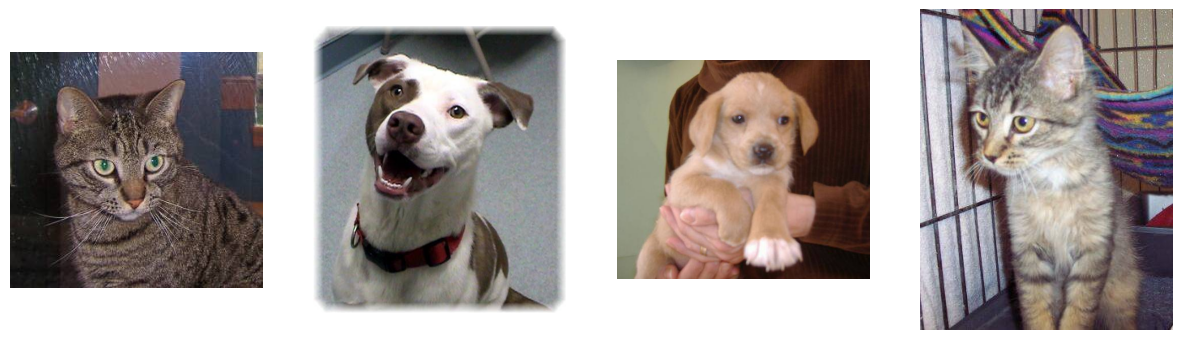

In [ ]:
filelist = os.listdir('/content/dog_vs_cat/images')

images = []

for i in filelist[:4]:
  numberized = Image.open('/content/dog_vs_cat/images/' + i)
  images.append(np.array(numberized))
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axs[i-1].imshow(images[i])
    axs[i-1].axis('off')
plt.show()

In [ ]:
%cd dog_vs_cat

[Errno 2] No such file or directory: 'dog_vs_cat'
/content/dog_vs_cat


In [ ]:
#Running the created model on the testing data
!python3 predict.py     -i ./input     -o ./output     -m ./saved_model     -l ./label_map.pbtxt     -t 0.5

2023-10-22 21:33:24.976504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 21:33:26.110233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

Predicting for 1.jpg
2023-10-22 21:35:01.682722: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1338163200 exceeds 10% of free system memory.
Prediction saved to ./output/1.jpg

Predicting for 14.jpg
2023-10-22 21:36:08.552432: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1338163200 exceeds 10% of free system memory.
Prediction saved to ./output/14.jpg

Predicting for 5.jpg
2023-10-22 21:37:15.231058: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1338163200 exceeds 10% of free system memory.
Pre

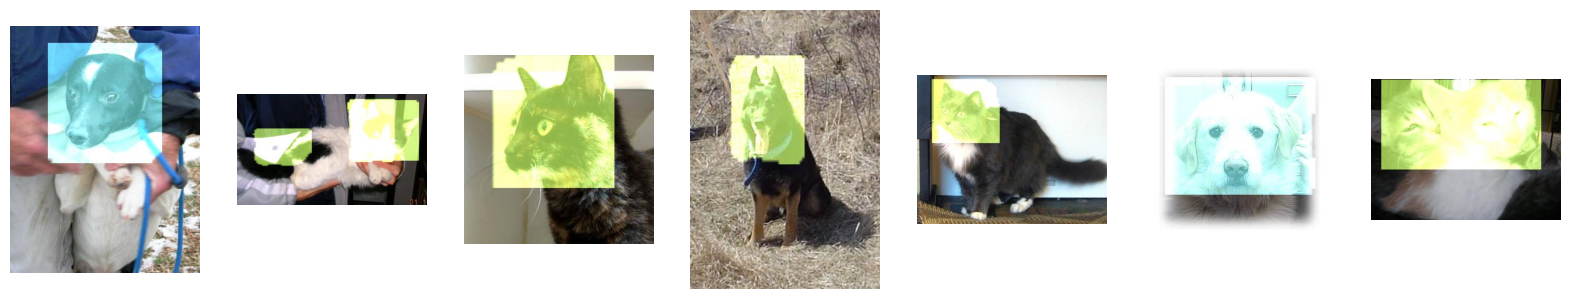

In [ ]:
#Output
filelist = os.listdir('/content/dog_vs_cat/output')
selected_images = [np.array(Image.open(f'/content/dog_vs_cat/output/{filename}')) for filename in filelist]

fig, axs = plt.subplots(1, len(selected_images), figsize=(20, 5))

for i, img in enumerate(selected_images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

# Result
The results for this model were also very satisfying, especially considering the limitation of using only 300 images. Just like the previous example, the model accurately analyzed most images in which the object was positioned directly facing the camera. However, it struggled with images featuring two objects as well as more complex images. An example of this is the fourth image, where the dog has sharp ears, leading the model to mistakenly identify it as a cat.